In [1]:
from QPIXL_qiskit.helper import *
from QPIXL_qiskit.qpixl_parallel import *
from qiskit.visualization import *
from qiskit_aer import StatevectorSimulator
import qiskit 
backend = StatevectorSimulator(method="statevector")

In [2]:
from PIL import Image
import matplotlib.pyplot as plt
img = Image.open('figures/creation_world.png')
img = img.convert('L')
img = np.array(img.resize((32,32), Image.Resampling.LANCZOS))
img2 = Image.open('figures/cat.webp')
img2 = img2.convert('L')
img2 = np.array(img2.resize((32,32), Image.Resampling.LANCZOS))
print(img2.shape,img.shape)

(32, 32) (32, 32)


In [25]:
shape = img.shape
np_frame = [np.array(img).T.flatten(),np.array(img2).T.flatten(),np.flip(np.array(img2).T.flatten()),np.flip(np.array(img2)).flatten()] #sometimes you have to transpose the image for the decoding to make sense
decoded_data = []
labels = []
comp_str = "Compression: "+str(0)+"% \n"
qc = cFRQI(np_frame,0)
job = backend.run(qc)
depth_str = " Circuit depth: "+str(qc.depth())
#### Just for show
sv = np.real(job.result().get_statevector())
decoded = decodeParallelQPIXL(sv,qc,len(np_frame))
for datum in decoded:
    decoded_data.append(reconstruct_img(datum, shape))
labels.append(comp_str+depth_str)


10
[1, 2, 3]
[0, 2, 3]
[0, 1, 3]
[0, 1, 2]


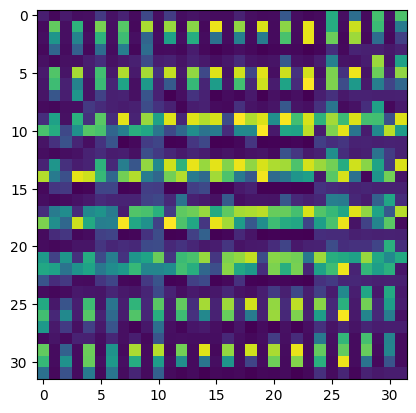

In [29]:
plt.imshow(decoded_data[3])

In [4]:
def permute_bits(b,bitlength=8,shift=1):
    b = bin(b)
    b = b[2:].zfill(bitlength)
    b = [b[(i + shift) % len(b)] for i in range(len(b))]
    return int(''.join(b),2)

[1, 0, 2]


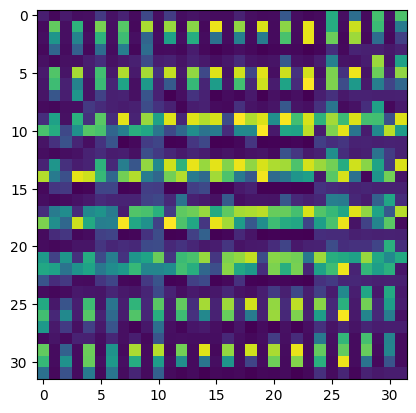

In [51]:
dataset = 3
traced_over_qubits = [ qc.qubits.index(qubit) for qubit in [qc.qubits[other] for other in [1,0,2]] ]
print(traced_over_qubits)
density_matrix = qiskit.quantum_info.partial_trace(sv, traced_over_qubits)
probs = density_matrix.probabilities()
test = decodeQPIXL(probs)
ordered = [test[permute_bits(i,len(qc.qubits)-len(np_frame),dataset)] for i in range(len(test))]
plt.imshow(reconstruct_img(ordered, shape))

In [94]:
permute_bits(4)


00000100
['0', '0', '0', '0', '0', '0', '1', '0']


2

In [259]:
qc.draw()

┌────────────┐     ┌───┐ ┌──────────────┐     ┌───┐┌──────────────┐     »
q_0: ┤ Ry(1.9717) ├─────┤ X ├─┤ Ry(0.021271) ├─────┤ X ├┤ Ry(-0.73467) ├─────»
     ├────────────┤┌───┐└─┬─┘┌┴──────────────┤┌───┐└─┬─┘├──────────────┤┌───┐»
q_1: ┤ Ry(1.9717) ├┤ X ├──┼──┤ Ry(-0.021271) ├┤ X ├──┼──┤ Ry(-0.73467) ├┤ X ├»
     └───┬───┬────┘└─┬─┘  │  └───────────────┘└─┬─┘  │  └──────────────┘└─┬─┘»
q_2: ────┤ H ├───────■────┼─────────────────────┼────┼────────────────────■──»
         ├───┤            │                     │    │                       »
q_3: ────┤ H ├────────────■─────────────────────■────┼───────────────────────»
         ├───┤                                       │                       »
q_4: ────┤ H ├───────────────────────────────────────■───────────────────────»
         ├───┤                                                               »
q_5: ────┤ H ├───────────────────────────────────────────────────────────────»
         └───┘                                                               »
«     ┌───┐┌──────────────┐     ┌───┐ ┌──────────────┐     ┌───┐»
«q_0: ┤ X ├┤ Ry(-0.13254) ├─────┤ X ├─┤ Ry(0.057269) ├─────┤ X ├»
«     └─┬─┘├─────────────┬┘┌───┐└─┬─┘┌┴──────────────┤┌───┐└─┬─┘»
«q_1: ──┼──┤ Ry(0.13254) ├─┤ X ├──┼──┤ Ry(-0.057269) ├┤ X ├──┼──»
«       │  └─────────────┘ └─┬─┘  │  └───────────────┘└─┬─┘  │  »
«q_2: ──┼────────────────────┼────┼─────────────────────■────┼──»
«       │                    │    │                          │  »
«q_3: ──■────────────────────┼────┼──────────────────────────■──»
«                            │    │                             »
«q_4: ───────────────────────■────┼─────────────────────────────»
«                                 │                             »
«q_5: ────────────────────────────■─────────────────────────────»
«                                                               »
«     ┌──────────────┐     ┌───┐┌────────────┐     ┌───┐┌───────────────┐     »
«q_0: ┤ Ry(0.044179) ├─────┤ X ├┤ Ry(-π/640) ├─────┤ X ├┤ Ry(-0.031089) ├─────»
«     ├──────────────┤┌───┐└─┬─┘├───────────┬┘┌───┐└─┬─┘├───────────────┤┌───┐»
«q_1: ┤ Ry(0.044179) ├┤ X ├──┼──┤ Ry(π/640) ├─┤ X ├──┼──┤ Ry(-0.031089) ├┤ X ├»
«     └──────────────┘└─┬─┘  │  └───────────┘ └─┬─┘  │  └───────────────┘└─┬─┘»
«q_2: ──────────────────┼────┼──────────────────■────┼─────────────────────┼──»
«                       │    │                       │                     │  »
«q_3: ──────────────────■────┼───────────────────────■─────────────────────┼──»
«                            │                                             │  »
«q_4: ───────────────────────■─────────────────────────────────────────────┼──»
«                                                                          │  »
«q_5: ─────────────────────────────────────────────────────────────────────■──»
«                                                                             »
«     ┌───┐┌─────────────┐     ┌───┐┌───────────────┐     ┌───┐┌─────────────┐»
«q_0: ┤ X ├┤ Ry(-π/1920) ├─────┤ X ├┤ Ry(-0.040906) ├─────┤ X ├┤ Ry(-0.1489) ├»
«     └─┬─┘├─────────────┤┌───┐└─┬─┘└┬──────────────┤┌───┐└─┬─┘├─────────────┤»
«q_1: ──┼──┤ Ry(-π/1920) ├┤ X ├──┼───┤ Ry(0.040906) ├┤ X ├──┼──┤ Ry(-0.1489) ├»
«       │  └─────────────┘└─┬─┘  │   └──────────────┘└─┬─┘  │  └─────────────┘»
«q_2: ──■───────────────────■────┼─────────────────────┼────┼─────────────────»
«                                │                     │    │                 »
«q_3: ───────────────────────────■─────────────────────■────┼─────────────────»
«                                                           │                 »
«q_4: ──────────────────────────────────────────────────────■─────────────────»
«                                                                             »
«q_5: ────────────────────────────────────────────────────────────────────────»
«                                                                             »
«          ┌───┐┌───────────────┐     ┌─

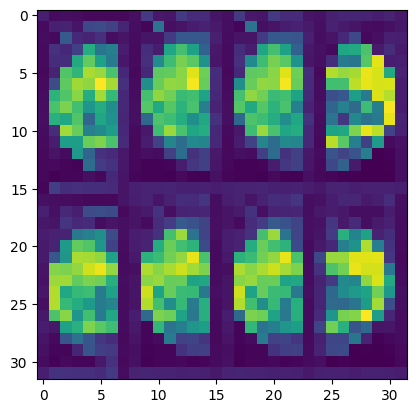

In [7]:
plt.imshow(decoded_data[1])